In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models, utils
import numpy as np

In [2]:
# Create list of all targets (minus background noise)

dataset_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\padded'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)
numclasses = len(all_targets)
print(numclasses)

['A#3', 'A#4', 'A3', 'A4', 'B3', 'B4', 'C#3', 'C#4', 'C3', 'C4', 'D#3', 'D#4', 'D3', 'D4', 'E3', 'E4', 'F#3', 'F#4', 'F3', 'F4', 'G3', 'G4']
22


In [3]:
# Settings
feature_sets_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\audioScripts'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'AudioModel.h5'


In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1024, 16, 16)
(128, 16, 16)
(128, 16, 16)


In [7]:
# Peek at labels
print(y_val)

[ 4.  5.  1.  9. 19. 17.  1.  0. 17. 13.  5.  9.  1.  1.  7.  7.  7.  7.
 15. 19.  0.  7.  8.  8. 14.  6. 11.  3. 14.  1. 10. 12. 14.  5. 15.  2.
  1.  5. 10.  6. 15. 14. 19. 18.  8.  3. 17. 15. 17. 19.  9.  2. 13. 19.
 18. 11.  3.  7.  0. 19. 11. 20. 13.  9. 13.  4. 19. 10. 10. 16. 18. 16.
 17. 10. 13. 17. 19.  2.  4. 13.  7.  7. 11.  1. 21. 16. 10. 20.  1.  8.
 16. 15. 14. 20.  3. 13. 20.  3.  2. 14.  9. 13.  7.  2. 16.  2.  2. 16.
  5. 16.  9. 16.  6. 11. 17.  6. 11. 10. 21. 18. 16. 11.  7. 19. 11.  3.
 10.  8.]


In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
#ytr = []
#yv = []
#yts = []
#count = 1
#for pitch in all_targets:
#    pitch_index = all_targets.index(pitch)
#    ytr.append(np.equal(y_train, pitch_index).astype('float64'))
#    yv.append( np.equal(y_val, pitch_index).astype('float64'))
#    yts.append(np.equal(y_test, pitch_index).astype('float64'))
    #count = count + 1


In [9]:
# Peek at labels after conversion
print(y_train)

[11.  9. 21. ...  1. 15.  7.]


In [10]:
# What percentage of 'stop' appear in validation labels
#print(sum(y_val) / len(y_val))
#print(1 - sum(y_val) / len(y_val))

In [11]:
# View the dimensions of our input data
#print(x_train.shape)

In [12]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

y_train = utils.to_categorical(y_train, numclasses)
y_test = utils.to_categorical(y_test, numclasses)
y_val = utils.to_categorical(y_val, numclasses)

#fig=plt.figure()
#plt.imshow(x_val[11], cmap='inferno', origin='lower')

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1024, 16, 16, 1)
(128, 16, 16, 1)
(128, 16, 16, 1)


In [13]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [14]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(numclasses, activation="softmax"))

In [15]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [16]:
# Add training parameters to model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [25]:
# Train
#pitch_index = all_targets.index(pitch)
history = model.fit(x_train, 
                    y_train, 
                    epochs=500, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/500
11/11 [==============================] - 0s 18ms/step - loss: 0.3681 - acc: 0.8623 - val_loss: 7.7468 - val_acc: 0.3203
Epoch 2/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3317 - acc: 0.8740 - val_loss: 7.6691 - val_acc: 0.3047
Epoch 3/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3636 - acc: 0.8555 - val_loss: 7.3694 - val_acc: 0.3125
Epoch 4/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3324 - acc: 0.8760 - val_loss: 7.2238 - val_acc: 0.3125
Epoch 5/500
11/11 [==============================] - 0s 13ms/step - loss: 0.3373 - acc: 0.8643 - val_loss: 7.2778 - val_acc: 0.3047
Epoch 6/500
11/11 [==============================] - 0s 14ms/step - loss: 0.3294 - acc: 0.8750 - val_loss: 7.3746 - val_acc: 0.2891
Epoch 7/500
11/11 [==============================] - 0s 13ms/step - loss: 0.3243 - acc: 0.8662 - val_loss: 7.5692 - val_acc: 0.2578
Epoch 8/500
11/11 [==============================] - 0s 14ms/step - loss: 0.

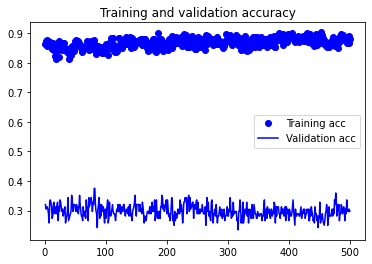

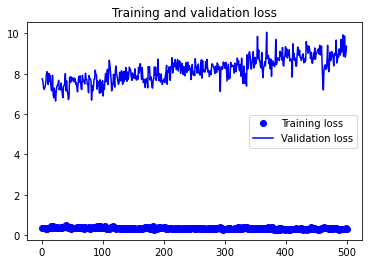

In [26]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Save the model as a file
models.save_model(model, model_filename)

In [21]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [22]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(1, 50):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

1/1 [==============================] - 0s 109ms/step
Answer: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  Prediction: [[1.4599377e-01 6.5802537e-06 2.1392162e-01 4.4309755e-04 1.4215791e-01
  7.4373347e-08 4.7114689e-05 8.6477265e-02 4.3328587e-04 1.1555925e-01
  6.8693444e-06 1.7420533e-01 3.3629502e-05 9.8195873e-02 1.0535244e-06
  2.2403393e-02 6.4767011e-07 1.6331544e-05 2.1647173e-05 3.5909408e-05
  1.2909338e-05 2.6410049e-05]]
1/1 [==============================] - 0s 17ms/step
Answer: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  Prediction: [[1.99363768e-01 8.13450129e-07 1.77398741e-01 6.63793980e-05
  1.34641215e-01 1.44748835e-08 1.17202590e-05 9.74207595e-02
  3.81633872e-04 1.44428581e-01 4.83868416e-06 1.15626335e-01
  1.21410867e-05 1.20789312e-01 9.49258947e-07 9.83119570e-03
  2.90852569e-07 1.23397797e-06 8.25931238e-06 3.38180757e-06
  5.77809396e-06 2.71933663e-06]]
1/1 [==============================] - 0s 17ms/step
A

In [ ]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)